# Plot the displacement per subdistrict and month

- prepared data from /Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact_month_idx.csv.
    - It contains some info on the month_idx which is the id of the month starting from April 2018 until August 2019 with missing values for June and July in both years
    
- aggregated data (by month and subdistrict the sum each) is in /Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact_month_idx.agg_sum.csv

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
%matplotlib inline

Import aggregated data

In [74]:
data = pd.read_csv('/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact_month_idx.csv', index_col=0)
# aggregate min and max IDPs
data_agg = data[['month_idx','gov_code','distr_code','sbd_code','min_IDPs','max_IDPs', 'min_pre_conf_pop_remained', 'max_pre_conf_pop_remained']]\
                .groupby(['month_idx','sbd_code'])\
                .agg({'min_IDPs': 'sum', 'max_IDPs': 'sum', 'min_pre_conf_pop_remained': 'mean', 'max_pre_conf_pop_remained': 'mean'})\
                .reset_index()
data_agg = data_agg.rename(columns={"min_IDPs": "min_IDPs_sum", "max_IDPs": "max_IDPs_sum", "min_pre_conf_pop_remained": "min_pre_conf_pop_remained_mean", "max_pre_conf_pop_remained": 'max_pre_conf_pop_remained_mean'})
data_agg = data_agg.merge(data[['gov_code','distr_code','sbd_code']], left_on='sbd_code', right_on='sbd_code', how='inner')
# data_agg['max_pre_conf_pop_remained'].value_counts()

data_agg

month_idx  sbd_code  min_IDPs_sum  max_IDPs_sum  \
0              1  SY020001       77100.0       79300.0   
1              1  SY020001       77100.0       79300.0   
2              1  SY020001       77100.0       79300.0   
3              1  SY020001       77100.0       79300.0   
4              1  SY020001       77100.0       79300.0   
...          ...       ...           ...           ...   
20320         17  SY090201        6000.0        6200.0   
20321         14  SY080302        1200.0        1500.0   
20322         14  SY080302        1200.0        1500.0   
20323         17  SY080302         200.0         220.0   
20324         17  SY080302         200.0         220.0   

       min_pre_conf_pop_remained_mean  max_pre_conf_pop_remained_mean  \
0                                76.0                           100.0   
1                                76.0                           100.0   
2                                76.0                           100.0   
3                                76.0                           100.0   
4                                76.0                           100.0   
...                               ...                             ...   
20320                            76.0                           100.0   
20321                            76.0                           100.0   
20322                            76.0                           100.0   
20323                            76.0                           100.0   
20324                            76.0                           100.0   

      gov_code distr_code  
0         SY02     SY0200  
1         SY02     SY0200  
2         SY02     SY0200  
3         SY02     SY0200  
4         SY02     SY0200  
...        ...        ...  
20320     SY09     SY0902  
20321     SY08     SY0803  
20322     SY08     SY0803  
20323     SY08     SY0803  
20324     SY08     SY0803  

[20325 rows x 8 columns]

In [75]:
code = 'SY090102'
month = 6
data[(data['sbd_code']==code)&(data['month_idx']==month)]['min_pre_conf_pop_remained'].mean(), data[(data['sbd_code']==code)&(data['month_idx']==month)]['max_pre_conf_pop_remained'].mean(), 

(76.0, 100.0)

In [76]:
data_agg['sbd_code'].sample(5)

9856     SY070301
15326    SY110100
19845    SY080200
7481     SY070203
17140    SY110302
Name: sbd_code, dtype: object

Convert month to a datetime object

Get the month string back from the month index

In [78]:
d_months = {
    'april2018': 1,
    'may2018': 2,
    'august2018': 5,
    'september2018': 6,
    'october2018': 7,
    'november2018': 8,
    'december2018': 9,
    'january2019': 10,
    'february2019': 11,
    'march2019': 12,
    'april2019': 13,
    'may2019': 14,
    'august2019': 17,

}

def get_key_back(x):
    """
    Gets back the string for the month if there is a value in the dictionary d_months.
    """
    available_values = list(d_months.values())
    if x in available_values:
        return list(d_months.keys())[available_values.index(x)]
    else:
        return np.nan


data_agg['month'] = data_agg['month_idx'].apply(lambda x: get_key_back(x))
data_agg

month_idx  sbd_code  min_IDPs_sum  max_IDPs_sum  \
0              1  SY020001       77100.0       79300.0   
1              1  SY020001       77100.0       79300.0   
2              1  SY020001       77100.0       79300.0   
3              1  SY020001       77100.0       79300.0   
4              1  SY020001       77100.0       79300.0   
...          ...       ...           ...           ...   
20320         17  SY090201        6000.0        6200.0   
20321         14  SY080302        1200.0        1500.0   
20322         14  SY080302        1200.0        1500.0   
20323         17  SY080302         200.0         220.0   
20324         17  SY080302         200.0         220.0   

       min_pre_conf_pop_remained_mean  max_pre_conf_pop_remained_mean  \
0                                76.0                           100.0   
1                                76.0                           100.0   
2                                76.0                           100.0   
3                                76.0                           100.0   
4                                76.0                           100.0   
...                               ...                             ...   
20320                            76.0                           100.0   
20321                            76.0                           100.0   
20322                            76.0                           100.0   
20323                            76.0                           100.0   
20324                            76.0                           100.0   

      gov_code distr_code       month  
0         SY02     SY0200   april2018  
1         SY02     SY0200   april2018  
2         SY02     SY0200   april2018  
3         SY02     SY0200   april2018  
4         SY02     SY0200   april2018  
...        ...        ...         ...  
20320     SY09     SY0902  august2019  
20321     SY08     SY0803     may2019  
20322     SY08     SY0803     may2019  
20323     SY08     SY0803  august2019  
20324     SY08     SY0803  august2019  

[20325 rows x 9 columns]

In [79]:
def convert_month_to_datetime(row):
    if type(row) == str: # nan entries
        _ = re.findall(r'([a-z]*)(\d*)',row)
        m = _[0][0] # month
        y = _[0][1] # year
        m = m.capitalize()
        time_ts = datetime.strptime(f'{m} {y}','%B %Y')
        ts = pd.to_datetime(time_ts).date()
    #     print(ts)
        return ts
    else:
        return np.nan

# convert
data_agg['month_str'] = data_agg['month'].apply(lambda x: convert_month_to_datetime(x))
data_agg

month_idx  sbd_code  min_IDPs_sum  max_IDPs_sum  \
0              1  SY020001       77100.0       79300.0   
1              1  SY020001       77100.0       79300.0   
2              1  SY020001       77100.0       79300.0   
3              1  SY020001       77100.0       79300.0   
4              1  SY020001       77100.0       79300.0   
...          ...       ...           ...           ...   
20320         17  SY090201        6000.0        6200.0   
20321         14  SY080302        1200.0        1500.0   
20322         14  SY080302        1200.0        1500.0   
20323         17  SY080302         200.0         220.0   
20324         17  SY080302         200.0         220.0   

       min_pre_conf_pop_remained_mean  max_pre_conf_pop_remained_mean  \
0                                76.0                           100.0   
1                                76.0                           100.0   
2                                76.0                           100.0   
3                                76.0                           100.0   
4                                76.0                           100.0   
...                               ...                             ...   
20320                            76.0                           100.0   
20321                            76.0                           100.0   
20322                            76.0                           100.0   
20323                            76.0                           100.0   
20324                            76.0                           100.0   

      gov_code distr_code       month   month_str  
0         SY02     SY0200   april2018  2018-04-01  
1         SY02     SY0200   april2018  2018-04-01  
2         SY02     SY0200   april2018  2018-04-01  
3         SY02     SY0200   april2018  2018-04-01  
4         SY02     SY0200   april2018  2018-04-01  
...        ...        ...         ...         ...  
20320     SY09     SY0902  august2019  2019-08-01  
20321     SY08     SY0803     may2019  2019-05-01  
20322     SY08     SY0803     may2019  2019-05-01  
20323     SY08     SY0803  august2019  2019-08-01  
20324     SY08     SY0803  august2019  2019-08-01  

[20325 rows x 10 columns]

In [80]:
# Export
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact_month_idx.with_pre_conf_pop.csv'
data_agg.to_csv(fname)
data_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20325 entries, 0 to 20324
Data columns (total 10 columns):
month_idx                         20325 non-null int64
sbd_code                          20325 non-null object
min_IDPs_sum                      20325 non-null float64
max_IDPs_sum                      20325 non-null float64
min_pre_conf_pop_remained_mean    20325 non-null float64
max_pre_conf_pop_remained_mean    20325 non-null float64
gov_code                          20309 non-null object
distr_code                        20309 non-null object
month                             20317 non-null object
month_str                         20317 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [28]:
# np.max(data_agg['min_IDPs_per_1k'])
data_agg.groupby('month')['min_IDPs_sum'].agg('max')

month
april2018        121500.0
april2019        388255.0
august2018       180130.0
august2019       453815.0
december2018     376000.0
february2019     373800.0
january2019      370900.0
march2019        382225.0
may2018          106500.0
may2019          471415.0
november2018     133300.0
september2018     93000.0
Name: min_IDPs_sum, dtype: float64

In [29]:

data_agg[data_agg['month']=='august2018']['min_IDPs_sum'].max()

180130.0

In [7]:
def get_range(df):
    """
    Returns the mean, median, 25%ile, 75%ile, min, and max of the (min) IDPs for each month over all subdistricts.
    """
    metric = 'min_IDPs_per_1k'
    
    mini = np.min(df[metric])
    maxi = np.max(df[metric])
    mean = np.mean(df[metric])
    median = np.median(df[metric])
    perc25 = np.percentile(df[metric], 25)
    perc75 = np.percentile(df[metric], 75)

    return pd.Series([mini, maxi, mean, median, perc25, perc75], index=['mini', 'maxi', 'mean', 'median', 'perc25', 'perc75'])
    
data_agg_trend = data_agg.groupby('month_str').apply(lambda x: get_range(x))
# save to csv
data_agg_trend.to_csv('/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.004.data_agg_trend.csv')
data_agg_trend

mini     maxi       mean  median  perc25  perc75
month_str                                                    
2018-04-01  0.100  121.500  24.765322   9.000   2.575  35.000
2018-05-01  0.150  106.500  25.187966   9.400   3.500  36.150
2018-08-01  0.030  180.130  39.624017  15.100   3.220  74.005
2018-09-01  0.000   93.000  19.897373   6.500   1.750  19.190
2018-11-01  0.025  133.300  26.016381   9.680   2.000  37.075
2018-12-01  0.020  376.000  39.821968  10.750   2.500  38.550
2019-01-01  0.020  370.900  39.356023   7.130   2.500  38.550
2019-02-01  0.030  373.800  40.006245  10.110   2.050  35.950
2019-03-01  0.025  382.225  40.503464   5.800   1.465  38.250
2019-04-01  0.025  388.255  42.036918   9.005   1.700  38.250
2019-05-01  0.030  471.415  46.865126   9.745   2.990  38.750
2019-08-01  0.015  453.815  49.005464   7.500   3.030  35.500

/Users/hkromer/anaconda3/envs/h4g/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


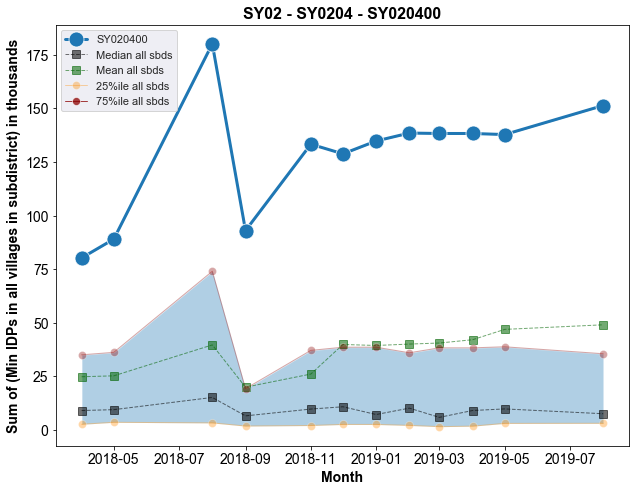

In [8]:
# pick one sbd by random
a = data_agg[data_agg['sbd_code']==data_agg['sbd_code'].sample(1).values[0]]

# get area information
gov = a['gov_code'].values[0]
distr = a['distr_code'].values[0]
sbd = a['sbd_code'].values[0]


fig, ax = plt.subplots(figsize=(9,7))
sns.set()

# plot the min IDPs
sns.lineplot(x="month_str", y="min_IDPs_per_1k", data=a, ax=ax, marker='o', linewidth=3, markersize=15, label=sbd)

# plot the median
ax.plot(data_agg_trend.index.values, data_agg_trend['median'].values, linestyle='dashed', linewidth=1, alpha=0.55, marker='s', markersize=8, color='black', label='Median all sbds')
# plot the mean
ax.plot(data_agg_trend.index.values, data_agg_trend['mean'].values, linestyle='dashed', linewidth=1, alpha=0.55, marker='s', markersize=8, color='darkgreen', label='Mean all sbds')

# plot the 25% and 75%iles
g = sns.lineplot(x=data_agg_trend.index, y="perc25", data=data_agg_trend,  ax=ax, linewidth=1, alpha=0.75, marker='o', markersize=8, color='darkorange', label='25%ile all sbds')
plt.setp(g.lines[3], alpha=.35)  
g = sns.lineplot(x=data_agg_trend.index, y="perc75", data=data_agg_trend, ax=ax, linewidth=1, alpha=0.75, marker='o', markersize=8, color='darkred', label='75%ile all sbds')
plt.setp(g.lines[4], alpha=.35)  

# shade area between 25% and 75%ile red-ish
ax.fill_between(data_agg_trend.index.values, data_agg_trend.perc75, data_agg_trend.perc25, alpha=0.35)


# add title and labels
ax.tick_params('both', colors='black', labelsize=14)
ax.set_title(f'{gov} - {distr} - {sbd}', fontweight='bold', fontsize=16)
ax.set_ylabel('Sum of (Min IDPs in all villages in subdistrict) in thousands', fontweight='bold', fontsize=14)
ax.set_xlabel('Month', fontweight='bold', fontsize=14)
# ax.set_ylim([0,50])
plt.tight_layout()
plt.show()

In [9]:
def plot_sbd_data(df, savepath):
    """
    Plots a lineplot of this subdistricts trend in displacement data. 
    Aggregate information on the plot is the mean, median, min, max, 25% and 75%ile for all the subdistricts.
    Savepath specifies where the plot will be saved to with filename gov_distr_sbd.pdf
    """
    # get area information
    gov = df['gov_code'].values[0]
    distr = df['distr_code'].values[0]
    sbd = df['sbd_code'].values[0]

    if not type(gov) == float: # remove the entries with nan, those are float datatype, rest is string

        fig, ax = plt.subplots(figsize=(9,7))
        sns.set()

        # plot the min IDPs
        sns.lineplot(x="month_str", y="min_IDPs_per_1k", data=df, ax=ax, marker='o', linewidth=3, markersize=15, label=sbd)

        # plot the median
        ax.plot(data_agg_trend.index.values, data_agg_trend['median'].values, linestyle='dashed', linewidth=1, alpha=0.55, marker='s', markersize=8, color='black', label='Median all sbds')
        # plot the mean
        ax.plot(data_agg_trend.index.values, data_agg_trend['mean'].values, linestyle='dashed', linewidth=1, alpha=0.55, marker='s', markersize=8, color='darkgreen', label='Mean all sbds')

        # plot the 25% and 75%iles
        g = sns.lineplot(x=data_agg_trend.index, y="perc25", data=data_agg_trend,  ax=ax, linewidth=1, alpha=0.75, marker='o', markersize=8, color='darkorange', label='25%ile all sbds')
        plt.setp(g.lines[3], alpha=.35)  
        g = sns.lineplot(x=data_agg_trend.index, y="perc75", data=data_agg_trend, ax=ax, linewidth=1, alpha=0.75, marker='o', markersize=8, color='darkred', label='75%ile all sbds')
        plt.setp(g.lines[4], alpha=.35)  

        # shade area between 25% and 75%ile red-ish
        ax.fill_between(data_agg_trend.index.values, data_agg_trend.perc75, data_agg_trend.perc25, alpha=0.35)


        # add title and labels
        ax.tick_params('both', colors='black', labelsize=14)
        ax.set_title(f'{gov} - {distr} - {sbd}', fontweight='bold', fontsize=16)
        ax.set_ylabel('Sum of (Min IDPs in all villages in subdistrict) in thousands', fontweight='bold', fontsize=14)
        ax.set_xlabel('Month', fontweight='bold', fontsize=14)
        # ax.set_ylim([0,50])
        plt.tight_layout()
        print(f'Saving file {gov}_{distr}_{sbd}.pdf')
        plt.savefig(f'{savepath}/{gov}_{distr}_{sbd}.pdf')
        plt.close()

savepath = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/SBD_plots/'
data_agg.groupby('sbd_code', as_index=True).apply(lambda x: plot_sbd_data(x, savepath))

Saving file SY02_SY0200_SY020001.pdf
Saving file SY02_SY0200_SY020003.pdf
Saving file SY02_SY0200_SY020004.pdf
Saving file SY02_SY0200_SY020005.pdf
Saving file SY02_SY0202_SY020200.pdf
Saving file SY02_SY0202_SY020203.pdf
Saving file SY02_SY0203_SY020300.pdf
Saving file SY02_SY0203_SY020301.pdf
Saving file SY02_SY0203_SY020302.pdf
Saving file SY02_SY0203_SY020303.pdf
Saving file SY02_SY0203_SY020304.pdf
Saving file SY02_SY0203_SY020305.pdf
Saving file SY02_SY0203_SY020306.pdf
Saving file SY02_SY0204_SY020400.pdf
Saving file SY02_SY0204_SY020401.pdf
Saving file SY02_SY0204_SY020403.pdf
Saving file SY02_SY0204_SY020405.pdf
Saving file SY02_SY0205_SY020500.pdf
Saving file SY02_SY0205_SY020501.pdf
Saving file SY02_SY0206_SY020600.pdf
Saving file SY02_SY0206_SY020601.pdf
Saving file SY02_SY0206_SY020602.pdf
Saving file SY02_SY0208_SY020800.pdf
Saving file SY02_SY0208_SY020801.pdf
Saving file SY03_SY0301_SY030105.pdf
Saving file SY03_SY0301_SY030106.pdf
Saving file SY03_SY0302_SY030200.pdf
S

Empty DataFrame
Columns: []
Index: []

In [11]:
data_agg.head()

month_idx  sbd_code  min_IDPs  max_IDPs  min_IDPs_per_1k  max_IDPs_per_1k  \
0          1  SY020001   77100.0   79300.0             77.1             79.3   
1          1  SY020001   77100.0   79300.0             77.1             79.3   
2          1  SY020001   77100.0   79300.0             77.1             79.3   
3          1  SY020001   77100.0   79300.0             77.1             79.3   
4          1  SY020001   77100.0   79300.0             77.1             79.3   

  gov_code distr_code      month   month_str  
0     SY02     SY0200  april2018  2018-04-01  
1     SY02     SY0200  april2018  2018-04-01  
2     SY02     SY0200  april2018  2018-04-01  
3     SY02     SY0200  april2018  2018-04-01  
4     SY02     SY0200  april2018  2018-04-01